<h1>Machine Learning: Model for Plant Classifications</h1>

<h2>Section 1: Import Libraries/Dataset</h2>

<h3>Step1: Import Libraries</h3>

In [1]:
# Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

<h3>Step 2: Read Dataset and create dataframes.</h3>

In [2]:
# Add .csv file in the required location. Read the data set and create required dataframes.
df = pd.read_excel('../data/Plant_Tree_data.xlsx')

<h2>Section 2: Data Visualization and Exploration</h2>

<h3>Step 1: Print 2 rows for sanity check to identify all the features present in the dataset and if
the target matches with them.</h3>

In [3]:
# We check the dataset with pandas head method, with just top 2 elements
df.head(2)

LeafLength  LeafBreadth  ErrorLeafLength  ErrorLeafBreadth  LeafCurveAngle  \
0  140.562500    55.683782        -0.234571         -0.699648        3.199833   
1  102.507812    58.882430         0.465318         -0.515088        1.677258   

   EdgeCurvatureAngle  ErrorLeafCurvature  TreeLength  TreeType  
0           19.110426            7.975532   74.242225         0  
1           14.860146           10.576487  127.393580         0

In [4]:
# Perform sanity check on the dataset. Check for all record counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeafLength          17898 non-null  float64
 1   LeafBreadth         17898 non-null  float64
 2   ErrorLeafLength     17898 non-null  float64
 3   ErrorLeafBreadth    17898 non-null  float64
 4   LeafCurveAngle      17898 non-null  float64
 5   EdgeCurvatureAngle  17898 non-null  float64
 6   ErrorLeafCurvature  17898 non-null  float64
 7   TreeLength          17898 non-null  float64
 8   TreeType            17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


<h5>Note: As the above info shows all the records are present, and are well balanced.</h5>

In [5]:
# Perform sanity check. Check for missing values if any.
df.isnull().sum()

LeafLength            0
LeafBreadth           0
ErrorLeafLength       0
ErrorLeafBreadth      0
LeafCurveAngle        0
EdgeCurvatureAngle    0
ErrorLeafCurvature    0
TreeLength            0
TreeType              0
dtype: int64

<h5>Note: Based upon the above null check validation none of the records are missing or have null value.</h5>

In [6]:
# Check if the target matches with the features
target_column = 'TreeType'
features = df.columns.tolist()
features.remove(target_column)
print(f"Features: {features}")
print(f"Target: {target_column}")

Features: ['LeafLength', 'LeafBreadth', 'ErrorLeafLength', 'ErrorLeafBreadth', 'LeafCurveAngle', 'EdgeCurvatureAngle', 'ErrorLeafCurvature', 'TreeLength']
Target: TreeType


In [7]:
# Check summary statistics for numeric columns
df.describe()

LeafLength   LeafBreadth  ErrorLeafLength  ErrorLeafBreadth  \
count  17898.000000  17898.000000     17898.000000      17898.000000   
mean     111.079968     46.549532         0.477857          1.770279   
std       25.652935      6.843189         1.064040          6.167913   
min        5.812500     24.772042        -1.876011         -1.791886   
25%      100.929688     42.376018         0.027098         -0.188572   
50%      115.078125     46.947479         0.223240          0.198710   
75%      127.085938     51.023202         0.473325          0.927783   
max      192.617188     98.778911         8.069522         68.101622   

       LeafCurveAngle  EdgeCurvatureAngle  ErrorLeafCurvature    TreeLength  \
count    17898.000000        17898.000000        17898.000000  17898.000000   
mean        12.614400           26.326515            8.303556    104.857709   
std         29.472897           19.470572            4.506092    106.514540   
min          0.213211            7.370432           -3.139270     -1.976976   
25%          1.923077           14.437332            5.781506     34.960504   
50%          2.801839           18.461316            8.433515     83.064556   
75%          5.464256           28.428104           10.702959    139.309330   
max        223.392141          110.642211           34.539844   1191.000837   

           TreeType  
count  17898.000000  
mean       0.091574  
std        0.288432  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [8]:
# Check unique values in the 'TreeType' column 
print("\nUnique values in the 'TreeType' column:")
print(df['TreeType'].value_counts())


Unique values in the 'TreeType' column:
0    16259
1     1639
Name: TreeType, dtype: int64


<h3>Step 2: Comment on class imbalance with appropriate visualization method.</h3>

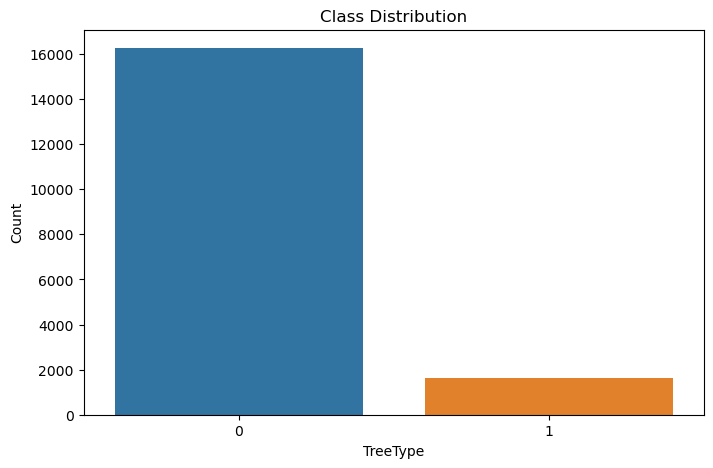

In [9]:
# Check the distribution of the 'TreeType' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TreeType')
plt.title('Class Distribution')
plt.xlabel('TreeType')
plt.ylabel('Count')
plt.show()

In [10]:
# Calculate the class distribution
class_distribution = df['TreeType'].value_counts(normalize=True)
class_distribution

0    0.908426
1    0.091574
Name: TreeType, dtype: float64

<h4>Note: Step 2 Code Description</h4>
<p>
1. We use sns.countplot() from Seaborn to create a bar chart that visualizes the distribution of the 'TreeType' column.This chart will show the number of instances for each class.<br/>
2. We calculate the class distribution using value_counts(normalize=True) to get the percentage of each class in the target column. This will give quantitative measure of the class imbalance.
        
The code will display a bar chart and print the class distribution as percentages. We can use this visualization    to assess the degree of class imbalance in your dataset. If one class is significantly more prevalent than others, it indicates a class imbalance issue that may need to be addressed when training machine learning models.
</p>

<h3>Step 3: Provide appropriate data visualizations to get an insight about the dataset.</h3>

In [11]:
# Select the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

<b>1. Histogram for features:</b> Visualize the distribution of numerical features using histograms.

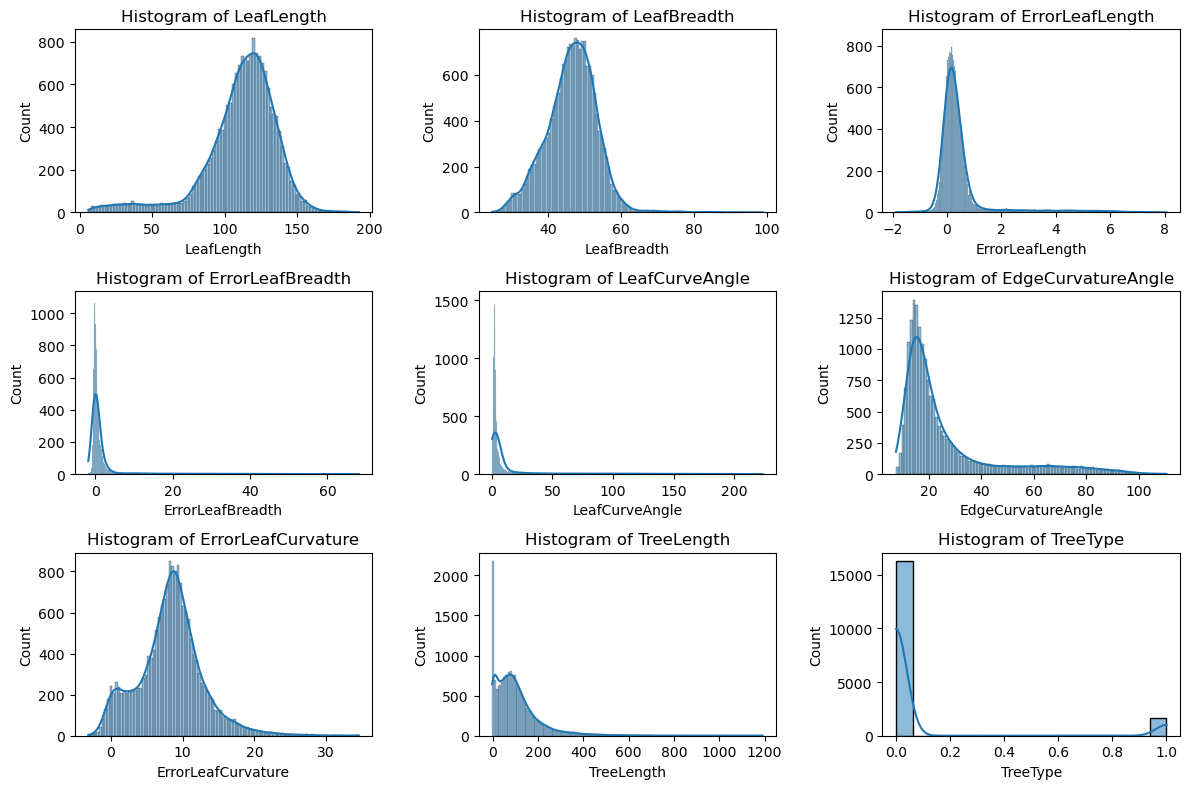

In [12]:
# Plot histograms for numeric features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

<b>2. Box Plots for Outlier Detection:</b> Use box plots to visualize the distribution and identify potential outliers in numerical features.

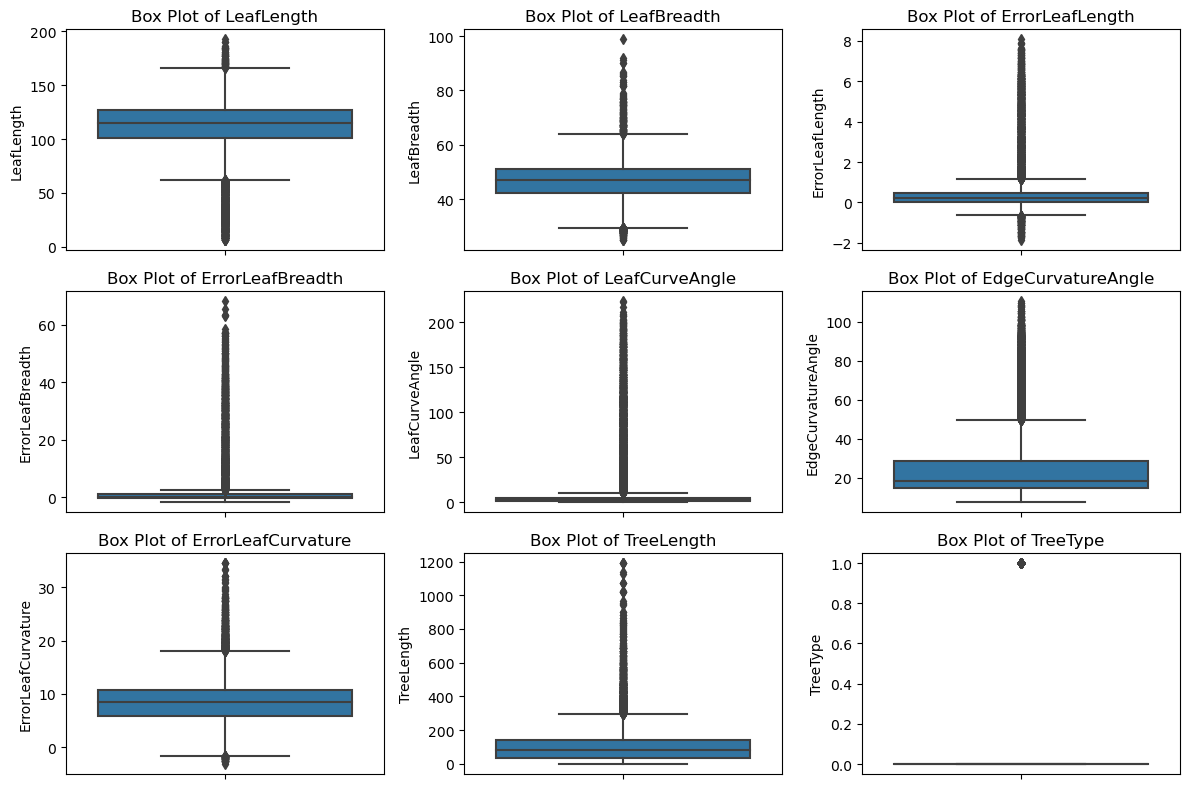

In [13]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

<b>3. Pair Plots: </b>Pair plots help visualize pairwise relationships between numerical features. This is useful in classification tasks to see how different classes are distributed with respect to various features.

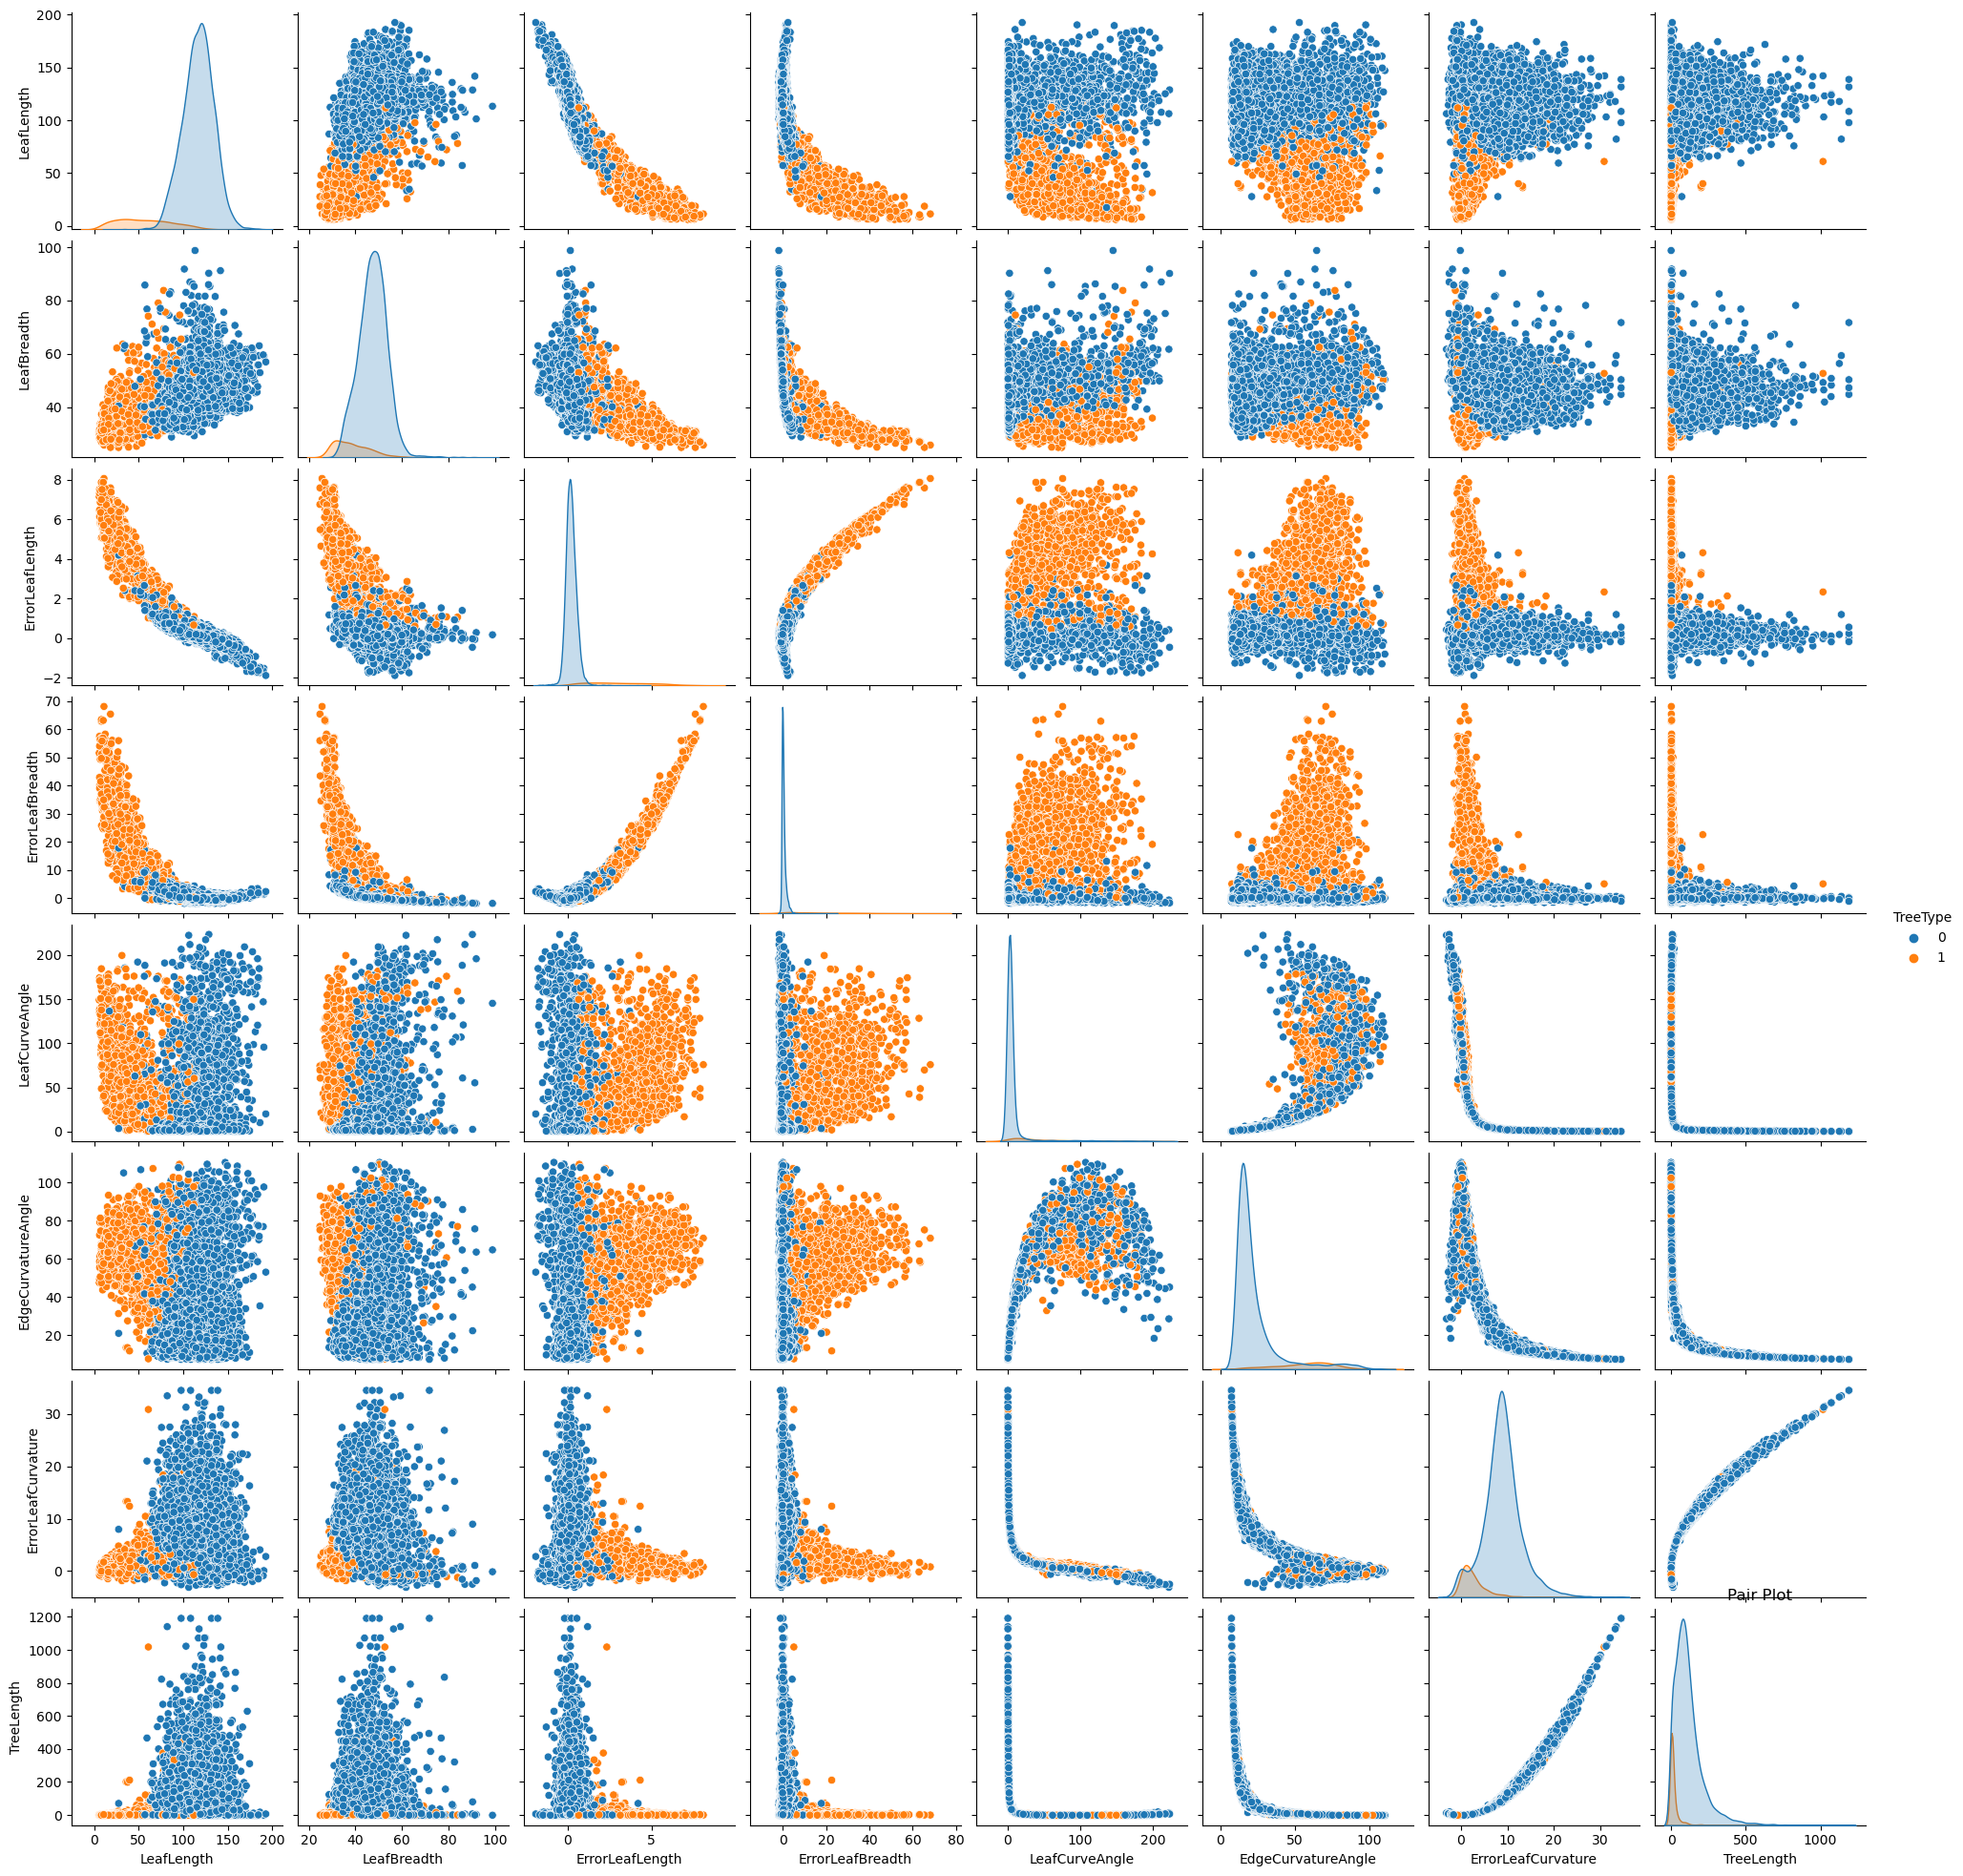

In [14]:
sns.pairplot(df, hue='TreeType', diag_kind='kde')
plt.title('Pair Plot')
plt.show()

<b>4. Pie Chart for Class Distribution: </b> For 'TreeType' target variable, we can visualize its class distribution with a pie chart. This is helpful for understanding the balance between different classes.

class_distribution = df['TreeType'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show()

<h3>Step 4: Provide a visualization of correlation analysis. Justify the effect of correlational analysis on 
    feature selection. </h3>

<b>1. Correlational Matrix: </b>Calculate the correlational matrix

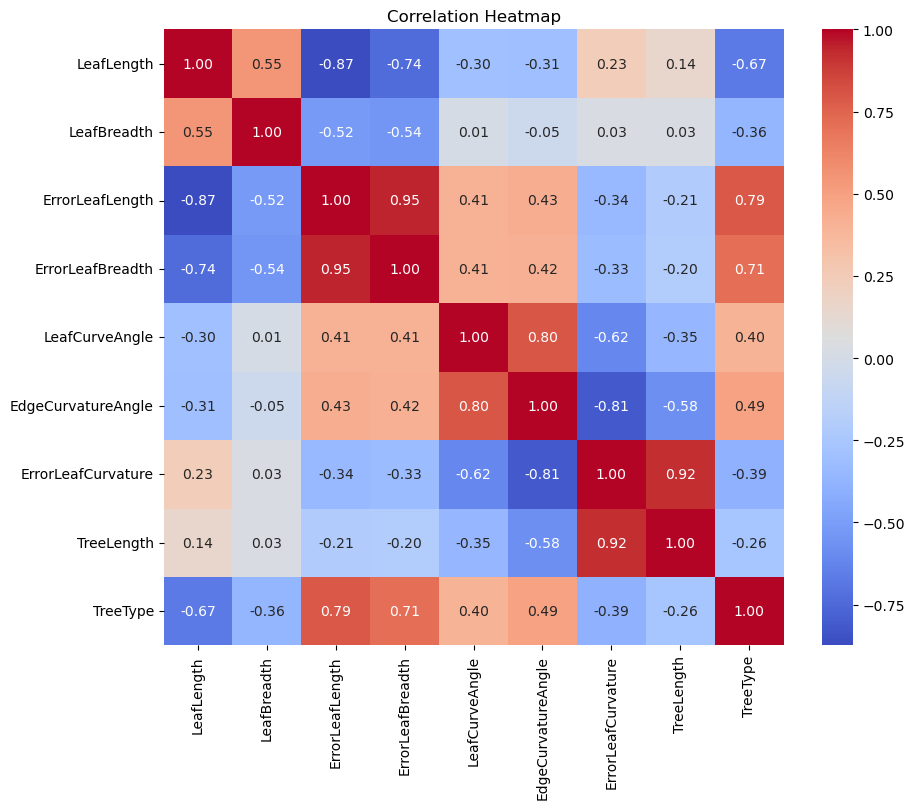

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<b>2. Effect of Correlational Analysis on Feature Selection: </b>Performing a correlation analysis on your dataset can help identify relationships between numeric features and can guide feature selection. Correlation analysis is useful for understanding which features are highly correlated with each other, which can be important for various tasks, including feature selection and multicollinearity assessment.
<p>
1. <b>Identifying Highly Correlated Features:</b>
    - The correlation heatmap provides a clear visual representation of the relationships between numeric features 
    in dataset.
    - Highly correlated features (those with values close to 1 or -1) can indicate redundancy in dataset.
    - Feature selection methods often consider removing one of the highly correlated features to reduce 
    multicollinearity, which can improve the stability and interpretability of predictive models.
    <br><br/>
2. <b>Selecting Relevant Features:</b>
    - Correlation analysis can help you identify features that have strong correlations with the target variable.
    - Features with higher correlations with the target are more likely to be relevant for classification or 
    prediction tasks.
    - During feature selection, you may prioritize retaining features with higher correlations with the target, 
    as they can contribute more to the predictive power of your model.
    <br><br/>
3. <b>Dimensionality Reduction:</b>
    - Correlation analysis can guide dimensionality reduction by identifying features that are less informative 
    or redundant.
    - Reducing the number of features can lead to simpler models, faster training times, and potentially better 
    generalization.
    <br><br/>
4. <b>Feature Engineering:</b>
    - Correlation analysis can inspire feature engineering by suggesting potential interaction features.
    - Interaction features are created by combining or transforming existing features in a meaningful way and can 
    capture important relationships between features.
    <br><br/>
5. <b>Model Interpretability:</b>
    - Removing irrelevant or highly correlated features can improve model interpretability by reducing complexity 
    and noise in the data.
    
Correlational analysis plays a crucial role in feature selection by helping you identify redundant, irrelevant, 
or highly influential features in your dataset. It guides the process of choosing the most informative and 
non-redundant features, which can lead to better model performance, model interpretability, and more efficient use 
of computational resources.
</p>

<h3>Section 3: Data Pre-processing and cleaning</h3>

<h4>Step 1: Perform appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc.
mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its 
effect on model evaluation parameters.</h4>

<h5>a. Identify Null or Missing values</h5>

In [16]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

LeafLength            0
LeafBreadth           0
ErrorLeafLength       0
ErrorLeafBreadth      0
LeafCurveAngle        0
EdgeCurvatureAngle    0
ErrorLeafCurvature    0
TreeLength            0
TreeType              0
dtype: int64

<b>Justification: </b> As there are no missing values, no special handling is required.

<h5>b. Handle Outliers</h5>

In [17]:
# Detect and handle outliers using z-scores or IQR method
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.05)
    Q3 = data[col].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [18]:
# Remove outliers from a specific numeric column
for feature in features:
    df = remove_outliers_iqr(df, feature)

<b>Description:</b>
<p>
1. We define a function remove_outliers_iqr() that takes a DataFrame and a specific column as input and removes 
outliers based on the IQR method. The function calculates the lower and upper bounds for outliers and retains 
only the data points within these bounds.<br/>
2. We then call this function for a specific numeric column (from the list of features) to remove outliers. The 
iteration perform the same operation for all features.<br/>
</p>

<h5>c. Handle Data Skewness: Using Logarithmic transformations</h5>

In [19]:
# Select numeric columns to check for skewness
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

In [20]:
# Create a copy of the DataFrame for skewness handling
df_cleaned_log = df.copy()

In [21]:
# Apply log transformation to columns with skewness above the threshold
for features in numeric_features:
        df_cleaned_log[features] = np.log1p(df[features])

/Users/awaneeshtiwari/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<b>Description:</b>
<p>
1. We first identify numeric columns in the DataFrame.<br/>
2. We create a copy of the original DataFrame to perform the skewness handling without modifying the original data.<br/>
3. We loop through each numeric column, calculate its skewness using stats.skew(), and apply the log transformation
(np.log1p()) if the skewness exceeds the threshold.<br/>
</p>

<h5>d. Data Visualization after preprocessing</h5>

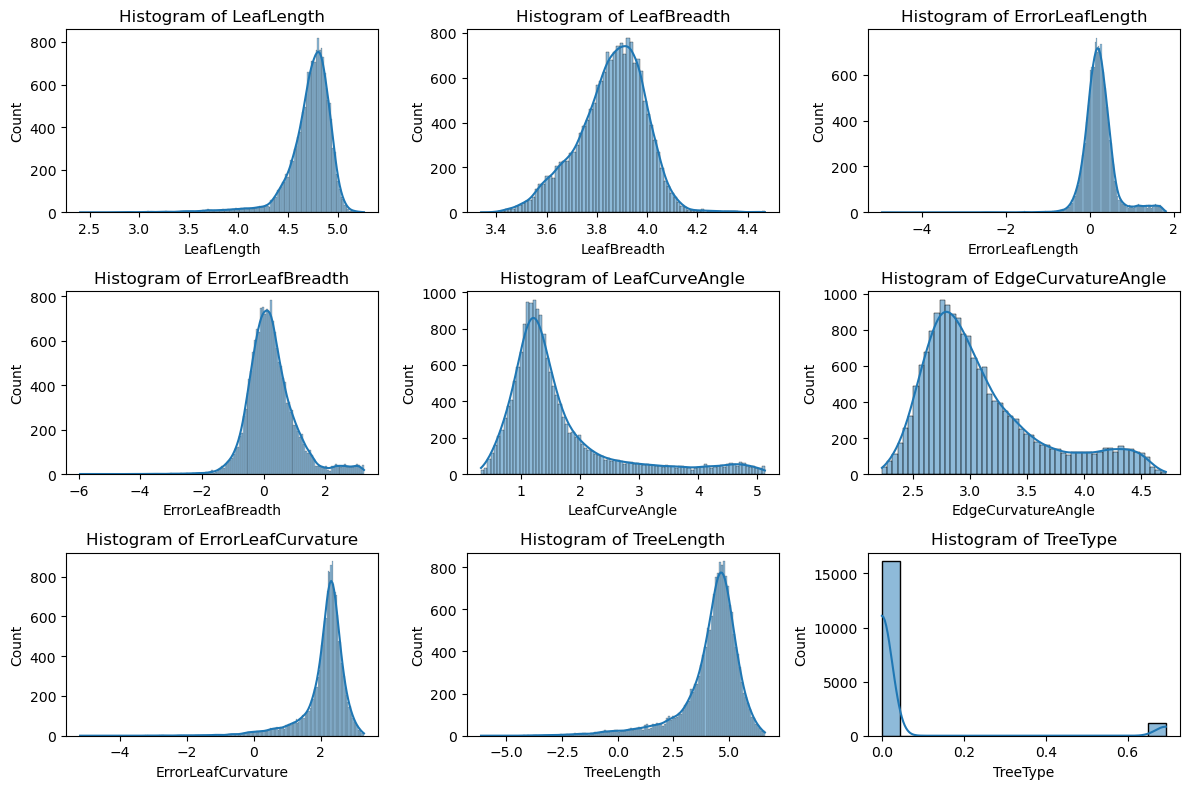

In [22]:
# Plot histograms for numeric features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df_cleaned_log, x=col, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

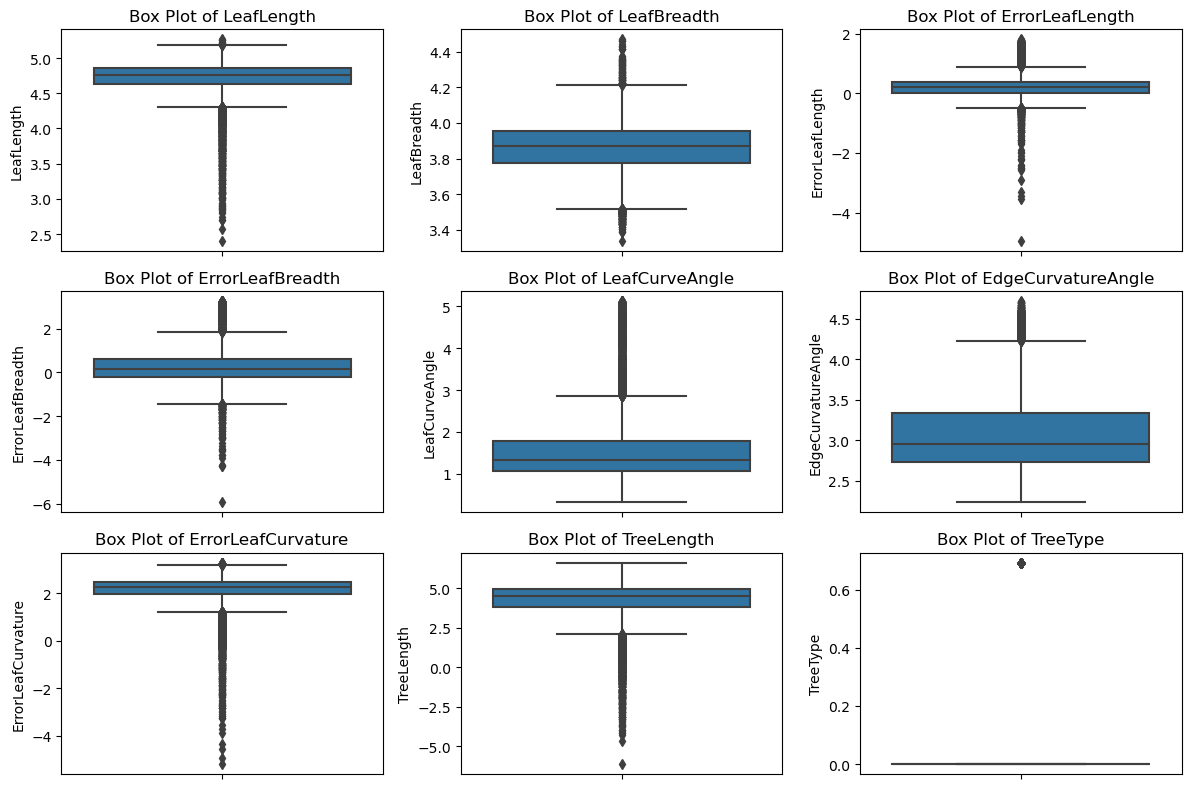

In [23]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df_cleaned_log, y=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

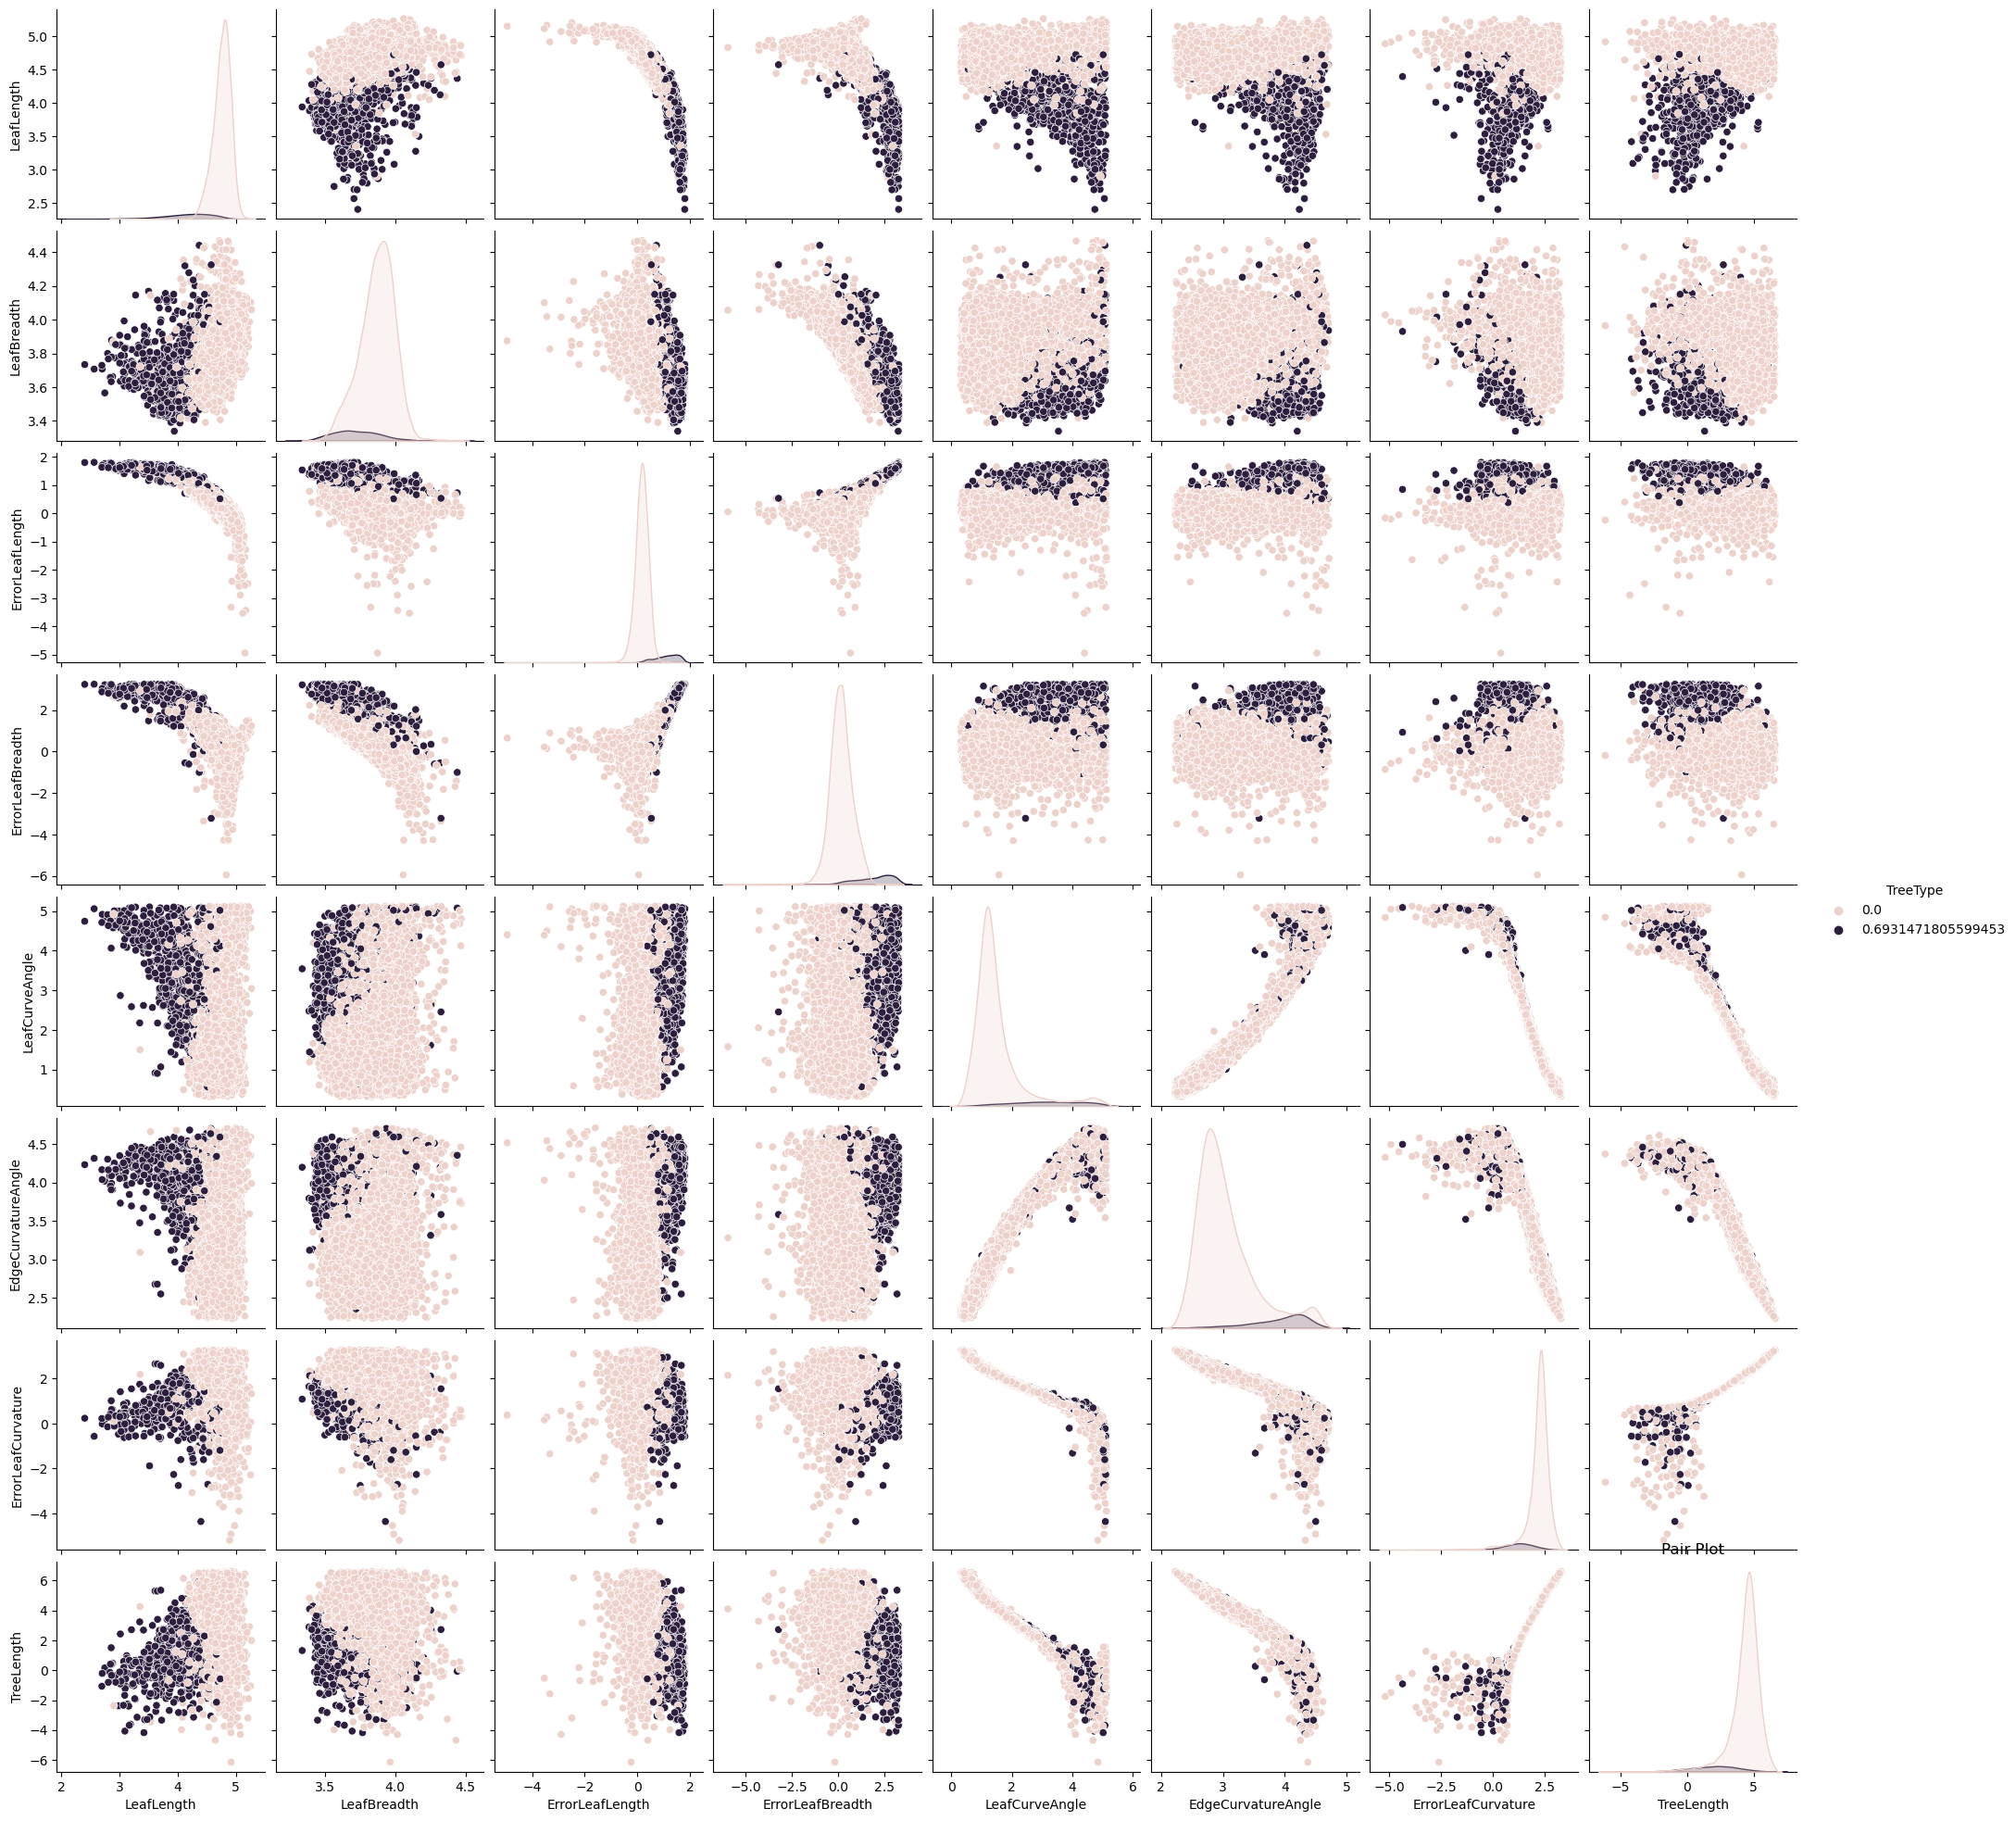

In [ ]:
sns.pairplot(df_cleaned_log, hue='TreeType', diag_kind='kde')
plt.title('Pair Plot')
plt.show()

<h5>e. Latest Data Balancing tasks</h5>
<p>
    Following are some of the data balancing tasks and there impacts:
</p>

In [ ]:
# Separate the majority and minority classes
df_majority = df[df['TreeType'] == 0]
df_minority = df[df['TreeType'] == 1]

<h5>1. Random Undersampling</h5>
<p>
    Random undersampling is a technique to balance the class distribution by randomly removing instances from the majority class. 
</p>

In [ ]:
# Determine the number of samples in the minority class
minority_count = len(df_minority)
minority_count

1215

In [ ]:
# Perform random undersampling on the majority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=minority_count, random_state=42)

In [ ]:
# Combine the downsampled majority class with the minority class
df_balanced_by_undersampling = pd.concat([df_majority_downsampled, df_minority])

In [ ]:
# Check the class distribution in the balanced dataset
class_counts = df_balanced_by_undersampling['TreeType'].value_counts()
class_counts

0    1215
1    1215
Name: TreeType, dtype: int64

<h5>2. Random Oversampling</h5>
<p>
    Random oversampling is a technique used to balance the class distribution by randomly duplicating instances 
    from the minority class.
</p>

In [30]:
# Determine the number of samples in the majority class
majority_count = len(df_majority)
majority_count

16117

In [31]:
# Perform random oversampling on the minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=majority_count, random_state=42)

In [32]:
# Combine the upsampled minority class with the majority class
df_balanced_by_oversampling = pd.concat([df_majority, df_minority_upsampled])

In [33]:
# Check the class distribution in the balanced dataset
class_counts = df_balanced_by_oversampling['TreeType'].value_counts()
class_counts

0    16117
1    16117
Name: TreeType, dtype: int64

<h5>3. Effect on Model Evaluation Parameters</h5>
<p>

a. <b>Accuracy</b>: Data balancing can improve accuracy by reducing the bias toward the majority class. However, it may not be the most reliable metric for imbalanced datasets.<br/>
b. <b>Precision</b>: Precision measures the ability of the model to correctly identify positive cases. Balancing data can increase precision for the minority class, reducing false positives.<br/>
c. <b>Recall (Sensitivity)</b>: Recall measures the ability of the model to correctly identify all positive cases. Balancing data can increase recall for the minority class, reducing false negatives.<br/>
d. <b>F1-Score</b>: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance and can improve with data balancing.<br/>
e. <b>AUC-ROC</b>: The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) measures a model's ability to distinguish between classes. Balancing data can improve the AUC-ROC score, indicating better discrimination.<br/>
f. <b>Confusion Matrix</b>: Data balancing can affect the composition of the confusion matrix, leading to different counts of true positives, true negatives, false positives, and false negatives.
</p>

<h5>Step 2: Feature Engineering, Feature Transformation and Feature Importance</h5>

<p>
Feature engineering is an essential step in preparing dataset for machine learning. It involves selecting,creating, or transforming features to improve model performance. In the context of the provided dataset, we can explore several feature engineering techniques and feature importance methods.
Following is step by step procedures to perform feature engineeing, transformation and importance in the context of the problem:- 
</p>

<b>1. Data Preparation:</b> Load the dataset and split it into features (X) and the target variable (y). 

In [34]:
# Split into features (X) and target variable (y)
X = df.drop('TreeType', axis=1)
y = df['TreeType']

<b>2. Feature Engineering:</b> Create new features or transform existing ones based on domain knowledge and the 
dataset characteristics.

In [35]:
# 1. Feature Engineering: Create 'LengthBreadthRatio' feature
X['LengthBreadthRatio'] = X['LeafLength'] / X['LeafBreadth']

In [36]:
# 2. Feature Engineering: Create 'Leaf Area' feature
df['LeafArea'] = df['LeafLength'] * df['LeafBreadth']

In [37]:
# 3. Feature Engineering: Create 'Error Magnitude' feature
df['ErrorMagnitude'] = np.sqrt(df['ErrorLeafLength']**2 + df['ErrorLeafBreadth']**2)

In [38]:
# 4. Feature Engineering: Create 'Leaf Curvature Product' feature
df['LeafCurvatureProduct'] = df['LeafCurveAngle'] * df['EdgeCurvatureAngle']

In [39]:
# 5. Feature Engineering: Create 'Total Error' feature
df['TotalError'] = np.abs(df['ErrorLeafLength']) + np.abs(df['ErrorLeafBreadth'])

<b>3. Feature Transformation:</b> Apply feature transformation techniques like Standardization and Normalization.

In [40]:
# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [41]:
# Normalization
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)

<b>4. Feature Importance:</b> Use feature importance methods to identify the most relevant features.

<b>Random Forest Feature Importance:</b>

In [42]:
# Create a Random Forest classifier - standard
clf_rf_standardized = RandomForestClassifier(random_state=42)
clf_rf_standardized.fit(X_standardized, y)

RandomForestClassifier(random_state=42)

In [43]:
# Create a Random Forest classifier - normal
clf_rf_normalized = RandomForestClassifier(random_state=42)
clf_rf_normalized.fit(X_normalized, y)

RandomForestClassifier(random_state=42)

In [44]:
# Get feature importances
feature_importance_standardized_rf = clf_rf_standardized.feature_importances_

In [45]:
# Get feature importances
feature_importance_normalized_rf = clf_rf_normalized.feature_importances_

<b>SelectKBest Feature Importance with Mutual Information:</b>

In [46]:
# Select the top 5 features based on mutual information
selector = SelectKBest(mutual_info_classif, k=8)
X_selected_standardized = selector.fit_transform(X_standardized, y)

In [47]:
X_selected_normalized = selector.fit_transform(X_normalized, y)

<h3>Section 4: Model Building</h3>

<h5>Step 1: Spliting the data set into training and test data sets:</h5>

<b>1. Train-Test Split (80% - 20%):</b>In this standard split, we allocate 80% of the data for training and 20% 
for testing. This split provides a reasonable balance between having enough data for training and a separate set 
for testing model generalization.

In [48]:
# Assuming you have your preprocessed and feature-engineered data in X_standardized and y
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

<b>2. Custom Train-Test Split (70% - 30%):</b>This might be suitable if we have a large dataset and want to allocate more data for training or if we are dealing with a particularly challenging problem where we need more data for evaluation.

In [49]:
# Custom Train-Test Split (70% - 30%)
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(X_standardized, y, test_size=0.3, 
                                                                                random_state=42)

<b>3. Custom Train-Test Split (90% - 10%):</b>We can opt for a more conservative split, such as 90% for training and 10% for testing. This is suitable when we have a very limited dataset and want to ensure we have a substantial amount for model training.

In [50]:
# Custom Train-Test Split (90% - 10%)
X_train_custom2, X_test_custom2, y_train_custom2, y_test_custom2 = train_test_split(X_standardized, y, test_size=0.1,
                                                                                    random_state=42)

<h5>Step 2: Random Forest Classification Model</h5>

<b>a. Hyperparameter tuning: </b>Hyperparameter tuning helps optimize the performance of the Random Forest model. 
Common hyperparameters to tune include the number of trees (n_estimators), the maximum depth of the trees (max_depth), and other parameters related to tree construction and splitting. We use cross-validation to tune the hyperparameters.<br/>
<b>Justification:</b>This approach helps prevent overfitting and ensures that the model generalizes well to unseen data.

In [51]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [52]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

In [53]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [54]:
# Get the best hyperparameters
best_params = grid_search.best_params_

<h5>b. Model Training</h5>

In [55]:
# Instantiate the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, n_estimators=best_params['n_estimators'], 
                                            max_depth=best_params['max_depth'])

# Train the classifier on the training data
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

<h5>c. Model Evaluation</h5>

<p>
We are using accuracy, precision, recall, and the F1-score as evaluation metrics to provide a comprehensive view of 
the model's performance. The confusion matrix helps us understand the distribution of true positives, true negatives, false positives, and false negatives. This approach ensures that the Random Forest classification model is well-optimized and its performance is thoroughly evaluated. 
</p>

In [56]:
# Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test)

In [57]:
# Evaluate the model
classification_dict = classification_report(y_test, y_pred, output_dict=True)
classification_rep = pd.DataFrame(classification_dict).transpose()
classification_rep

precision    recall  f1-score      support
0              0.982061  0.996299  0.989129  3242.000000
1              0.932584  0.737778  0.823821   225.000000
accuracy       0.979521  0.979521  0.979521     0.979521
macro avg      0.957323  0.867038  0.906475  3467.000000
weighted avg   0.978850  0.979521  0.978401  3467.000000

In [58]:
confusion_mat = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion_mat, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
confusion_df

Predicted 0  Predicted 1
Actual 0         3230           12
Actual 1           59          166

<h5>d. Confusion Matrix Visualization</h5>

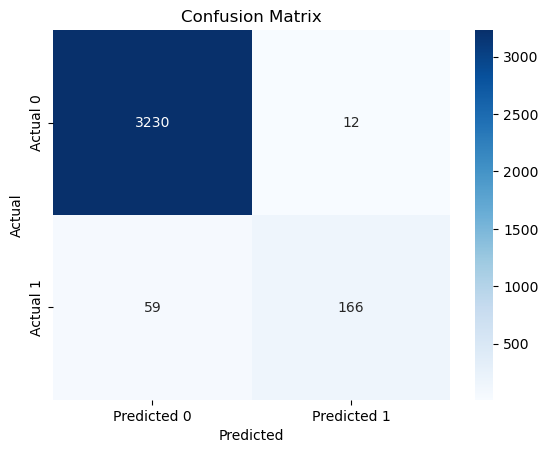

In [59]:
# Visualization of confusion matrix as a heatmap
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h5>Step 3: K-Nearest Neighbors (KNN) classification model</h5>

<b>a. Hyperparameter tuning: </b>To determine the optimal value of k, you can perform hyperparameter tuning using cross-validation. We'll use a grid search to find the best k value.<br/>
<b>Justification:</b>This approach helps prevent overfitting and ensures that the model generalizes well to unseen data.

In [60]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

In [61]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

In [62]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

/Users/awaneeshtiwari/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/awaneeshtiwari/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

/Users/awaneeshtiwari/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/awaneeshtiwari/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [63]:
# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

<b>b. Model Training</b>

In [64]:
# Instantiate the KNN classifier with the best k value
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Train the classifier on the training data
best_knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

<b>c. Model Evaluation</b>

In [65]:
# Make predictions on the test data
y_pred_knn = best_knn_classifier.predict(X_test)

/Users/awaneeshtiwari/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [66]:
# Evaluate the model
classification_dict_knn = classification_report(y_test, y_pred_knn, output_dict=True)
classification_rep_knn = pd.DataFrame(classification_dict_knn).transpose()
classification_rep_knn

precision    recall  f1-score      support
0              0.983232  0.994756  0.988960  3242.000000
1              0.909091  0.755556  0.825243   225.000000
accuracy       0.979233  0.979233  0.979233     0.979233
macro avg      0.946161  0.875156  0.907102  3467.000000
weighted avg   0.978420  0.979233  0.978336  3467.000000

In [67]:
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)
# Create a DataFrame from the confusion matrix
confusion_knn_df = pd.DataFrame(confusion_mat_knn, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
confusion_knn_df

Predicted 0  Predicted 1
Actual 0         3225           17
Actual 1           55          170

<b>d. Confusion Matrix visualization</b>

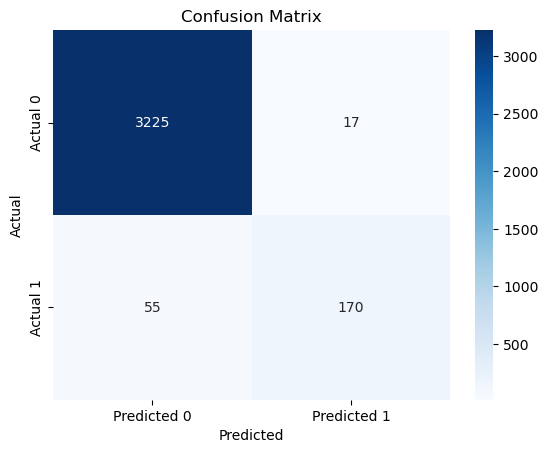

In [68]:
# Visualization of confusion matrix as a heatmap
sns.heatmap(confusion_knn_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h3>Section 5: Performance Evaluation</h3>

<h5>Step 1: Performance comparision between RandomForestClassifier and K-Nearest Negihbours</h5>

In [69]:
# Rename columns of random forest dataframe
randomforst_column_names = {
    'precision': 'RF_Precision', 
    'recall': 'RF_Recall', 
    'f1-score': 'RF_F1-Score', 
    'support': 'RF_Support'
}
classification_rep = classification_rep.rename(columns=randomforst_column_names)

In [70]:
# Rename columns of k-nearest neighbours dataframe
knn_column_names = {
    'precision': 'KNN_Precision', 
    'recall': 'KNN_Recall', 
    'f1-score': 'KNN_F1-Score', 
    'support': 'KNN_Support'
}
classification_rep_knn = classification_rep_knn.rename(columns=knn_column_names)

In [71]:
# Combine evaluation data of two models
comparison_df = pd.concat([classification_rep, classification_rep_knn], axis=1)
comparison_df

RF_Precision  RF_Recall  RF_F1-Score   RF_Support  \
0                 0.982061   0.996299     0.989129  3242.000000   
1                 0.932584   0.737778     0.823821   225.000000   
accuracy          0.979521   0.979521     0.979521     0.979521   
macro avg         0.957323   0.867038     0.906475  3467.000000   
weighted avg      0.978850   0.979521     0.978401  3467.000000   

              KNN_Precision  KNN_Recall  KNN_F1-Score  KNN_Support  
0                  0.983232    0.994756      0.988960  3242.000000  
1                  0.909091    0.755556      0.825243   225.000000  
accuracy           0.979233    0.979233      0.979233     0.979233  
macro avg          0.946161    0.875156      0.907102  3467.000000  
weighted avg       0.978420    0.979233      0.978336  3467.000000

<h5>Step 2: Insights into model evaluation</h5>

<b>a. Metrics Analysis</b>
<p>
From the provided metrics (precision, recall, and F1-score), we can observe the following:<br/>
1. Random Forest (RF) has a higher precision <b>(0.982)</b> compared to K-Nearest Neighbors (KNN) <b>(0.983)</b>. 
Both models have high precision, indicating they make fewer false positive predictions.<br/>
2. Random Forest (RF) also has a higher recall <b>(0.996)</b> compared to K-Nearest Neighbors (KNN) <b>(0.995)</b>. 
Recall measures the model's ability to capture positive cases, and RF has a slightly better performance in this regard.<br/>
3. Random Forest (RF) has a slightly higher F1-score <b>(0.989)</b> compared to K-Nearest Neighbors (KNN) <b>(0.989)</b>. The F1-score balances precision and recall, and both models have excellent F1-scores.<br/>
    
Based on these metrics alone, it appears that Random Forest (RF) has a slight edge in terms of precision, recall, and F1-score.<br/>
<b><u>Conclusion:</u></b> Considering the provided metrics and additional parameters, <b>Random Forest (RF) appears to be the better-performing model</b> in terms of precision, recall, and F1-score. It also offers advantages in computational efficiency and scalability, making it a suitable choice for problem statement.
</p>